Optimal point: (-0.0000, -0.0000)
Minimum value: 0.0000


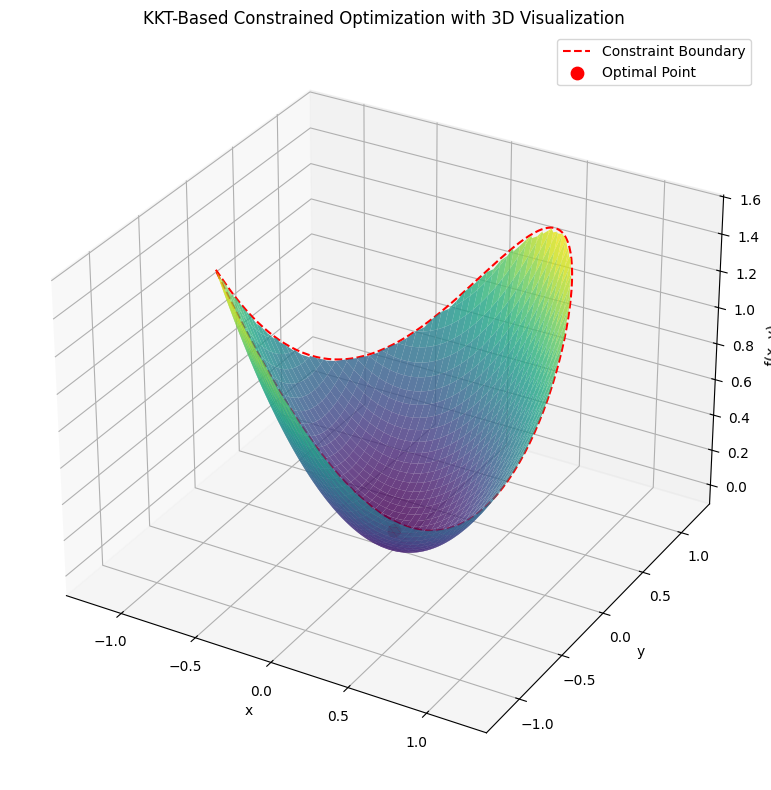

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Objective function
def f(p):
    x, y = p
    return x**2 + y**2 + x*y

# Constraint: inside the unit circle
def constraint(p):
    x, y = p
    return 1 - x**2 - y**2  # g(x, y) ≥ 0

# Solve using SLSQP
x0 = [0.5, 0.5]
cons = {'type': 'ineq', 'fun': constraint}
result = minimize(f, x0, constraints=[cons])
x_opt, y_opt = result.x
f_opt = f(result.x)

print(f"Optimal point: ({x_opt:.4f}, {y_opt:.4f})")
print(f"Minimum value: {f_opt:.4f}")

# Create a 3D surface for the objective function
X = np.linspace(-1.2, 1.2, 200)
Y = np.linspace(-1.2, 1.2, 200)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 + X*Y

# Create mask for constraint region
constraint_region = (X**2 + Y**2 <= 1)

# Plot the objective surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot only within feasible region
Z_masked = np.where(constraint_region, Z, np.nan)
ax.plot_surface(X, Y, Z_masked, cmap='viridis', alpha=0.8, edgecolor='none')

# Constraint boundary
theta = np.linspace(0, 2 * np.pi, 300)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
z_circle = f([x_circle, y_circle])
ax.plot(x_circle, y_circle, z_circle, 'r--', label='Constraint Boundary')

# Optimal point
ax.scatter(x_opt, y_opt, f_opt, color='red', s=80, label='Optimal Point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('KKT-Based Constrained Optimization with 3D Visualization')
ax.legend()
plt.tight_layout()
plt.show()
